In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv("new_data.csv")

In [2]:
df.head()

,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,DELAYED,combined_datetime,FL_DATETIME
0,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",-4.0,-14.0,0.0,0.0,1065.0,0,2019-01-09 11:55:00,2019-01-09 11:55:00
1,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",-6.0,-5.0,0.0,0.0,1399.0,0,2022-11-19 21:20:00,2022-11-19 21:20:00
2,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",6.0,0.0,0.0,0.0,680.0,0,2022-07-22 09:54:00,2022-07-22 09:54:00
3,Delta Air Lines Inc.,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",-1.0,24.0,0.0,0.0,1589.0,1,2023-03-06 16:09:00,2023-03-06 16:09:00
4,Spirit Air Lines,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,-1.0,0.0,0.0,985.0,0,2020-02-23 18:40:00,2020-02-23 18:40:00


In [3]:
df.isna().any()

AIRLINE              False
FL_NUMBER            False
ORIGIN               False
ORIGIN_CITY          False
DEST                 False
DEST_CITY            False
DEP_DELAY             True
ARR_DELAY             True
CANCELLED            False
DIVERTED             False
DISTANCE             False
DELAYED              False
combined_datetime    False
FL_DATETIME          False
dtype: bool

In [8]:
df['combined_datetime'] = pd.to_datetime(df['combined_datetime'])
df['hour_of_day'] = df['combined_datetime'].dt.hour
df['day_of_week'] = df['combined_datetime'].dt.dayofweek
df['month_of_year'] = df['combined_datetime'].dt.month

In [5]:
df.head()

,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,DELAYED,combined_datetime,FL_DATETIME,hour_of_day,day_of_week,month_of_year
0,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",-4.0,-14.0,0.0,0.0,1065.0,0,2019-01-09 11:55:00,2019-01-09 11:55:00,11,2,1
1,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",-6.0,-5.0,0.0,0.0,1399.0,0,2022-11-19 21:20:00,2022-11-19 21:20:00,21,5,11
2,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",6.0,0.0,0.0,0.0,680.0,0,2022-07-22 09:54:00,2022-07-22 09:54:00,9,4,7
3,Delta Air Lines Inc.,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",-1.0,24.0,0.0,0.0,1589.0,1,2023-03-06 16:09:00,2023-03-06 16:09:00,16,0,3
4,Spirit Air Lines,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,-1.0,0.0,0.0,985.0,0,2020-02-23 18:40:00,2020-02-23 18:40:00,18,6,2


In [5]:
X = df.drop(columns=['DELAYED','ORIGIN_CITY','DEST_CITY','FL_NUMBER','DEP_DELAY','ARR_DELAY','CANCELLED','DIVERTED','combined_datetime','FL_DATETIME'])
y = df['DELAYED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


numerical_cols = ['DISTANCE','hour_of_day', 'day_of_week','month_of_year']
categorical_cols = ['AIRLINE','ORIGIN', 'DEST']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])
model = LogisticRegression(max_iter=10000,random_state=0)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)  # Logistic regression model
])



In [7]:
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7844633333333333
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    470833
           1       0.44      0.00      0.01    129167

    accuracy                           0.78    600000
   macro avg       0.61      0.50      0.44    600000
weighted avg       0.71      0.78      0.69    600000



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 17 columns):
 #   Column             Dtype         
---  ------             -----         
 0   AIRLINE            object        
 1   FL_NUMBER          int64         
 2   ORIGIN             object        
 3   ORIGIN_CITY        object        
 4   DEST               object        
 5   DEST_CITY          object        
 6   DEP_DELAY          float64       
 7   ARR_DELAY          float64       
 8   CANCELLED          float64       
 9   DIVERTED           float64       
 10  DISTANCE           float64       
 11  DELAYED            int64         
 12  combined_datetime  datetime64[ns]
 13  FL_DATETIME        object        
 14  hour_of_day        int32         
 15  day_of_week        int32         
 16  month_of_year      int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2), object(6)
memory usage: 354.8+ MB


In [9]:
df.shape[0]

3000000

In [10]:
#This model performs very poorly at finding true negatives, maybe because of class imbalance

model = LogisticRegression(max_iter=10000,random_state=0,class_weight= 'balanced')
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)  # Logistic regression model
])
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
train_pred = pipeline.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6002983333333334
              precision    recall  f1-score   support

           0       0.85      0.60      0.70    470833
           1       0.29      0.60      0.39    129167

    accuracy                           0.60    600000
   macro avg       0.57      0.60      0.55    600000
weighted avg       0.73      0.60      0.64    600000



In [11]:
#much better! 

In [12]:
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))

Training Accuracy: 0.60054625
              precision    recall  f1-score   support

           0       0.85      0.60      0.70   1882678
           1       0.29      0.60      0.39    517322

    accuracy                           0.60   2400000
   macro avg       0.57      0.60      0.55   2400000
weighted avg       0.73      0.60      0.64   2400000



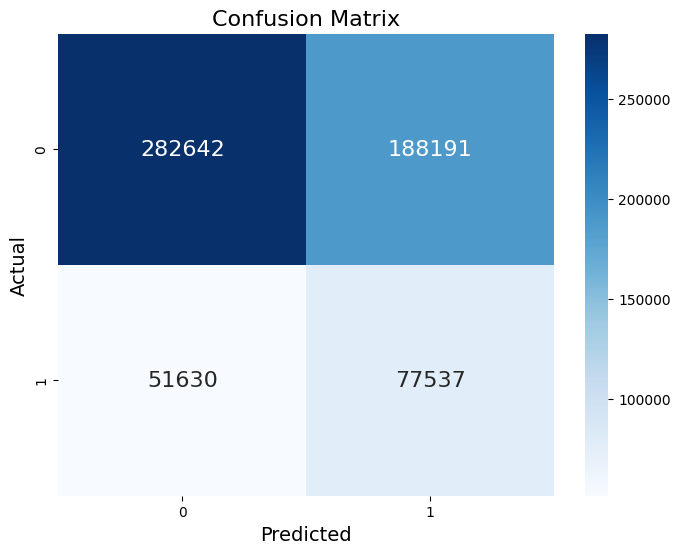

In [13]:
#training and testing perform the same 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()



In [14]:
import numpy as np


features = pipeline[:-1].get_feature_names_out()
features


array(['num__DISTANCE', 'num__hour_of_day', 'num__day_of_week', ...,
       'cat__DEST_CITY_Yakima, WA', 'cat__DEST_CITY_Yakutat, AK',
       'cat__DEST_CITY_Yuma, AZ'], dtype=object)

In [1]:
importances = model.coef_[0]
imp_df = pd.DataFrame({'Feature':features,'Importance':importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)
imp_df.head(15)


NameError: name 'model' is not defined

In [16]:
imp_df.tail(15)

,Feature,Importance
38,cat__ORIGIN_ALW,-0.501406
754,"cat__ORIGIN_CITY_Walla Walla, WA",-0.501406
390,cat__ORIGIN_VCT,-0.524627
752,"cat__ORIGIN_CITY_Victoria, TX",-0.524627
645,"cat__ORIGIN_CITY_Nome, AK",-0.531266
280,cat__ORIGIN_OME,-0.531266
362,cat__ORIGIN_SPN,-0.542534
698,"cat__ORIGIN_CITY_Saipan, TT",-0.542534
1159,"cat__DEST_CITY_Alamosa, CO",-0.544337
790,cat__DEST_ALS,-0.544337


In [9]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=None, n_jobs=-1, random_state=0)


In [10]:
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
train_pred = pipeline.predict(X_train)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    470833
           1       0.43      0.00      0.01    129167

    accuracy                           0.78    600000
   macro avg       0.61      0.50      0.44    600000
weighted avg       0.71      0.78      0.69    600000

